<a href="https://colab.research.google.com/github/ZahraAuliaHanifah/Semester-4/blob/main/Big_Data_Case_Assigment_12_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top 10 kata kunci terbanyak pada produk laris:
 boneka    80
plush     14
ukuran    13
mainan    12
lucu      11
kucing    10
bahan     10
hadiah     9
anak       8
guling     8
dtype: int64


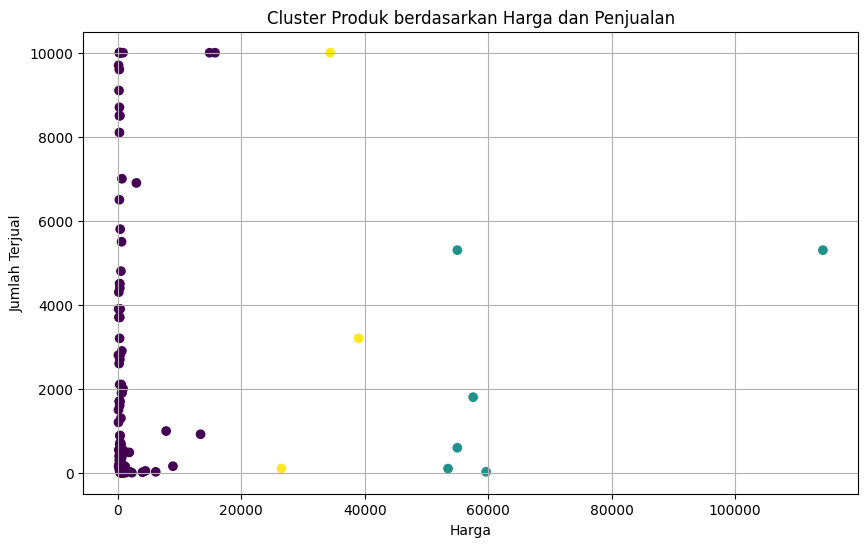

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer

# Load data
df = pd.read_csv("Popeye_cleaned.csv")

# Pastikan kolom numerik bertipe int atau float
df['Harga'] = pd.to_numeric(df['Harga'], errors='coerce')
df['Terjual'] = pd.to_numeric(df['Terjual'], errors='coerce')

# Drop baris yang tidak memiliki data harga atau terjual
df = df.dropna(subset=['Harga', 'Terjual'])

# Clustering berdasarkan Harga dan Terjual
X = df[['Harga', 'Terjual']]
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Regresi Linear
model = LinearRegression()
model.fit(df[['Harga']], df['Terjual'])
df['Prediksi_Terjual'] = model.predict(df[['Harga']])

# Frekuensi kata pada Nama Barang produk dengan penjualan tinggi
high_sellers = df[df['Terjual'] > df['Terjual'].median()]
vectorizer = CountVectorizer(stop_words='english')
X_title = vectorizer.fit_transform(high_sellers['Nama Barang'])
word_freq = pd.DataFrame(X_title.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Tampilkan 10 kata paling sering
print("Top 10 kata kunci terbanyak pada produk laris:\n", word_freq.head(10))

# Visualisasi Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['Harga'], df['Terjual'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Harga")
plt.ylabel("Jumlah Terjual")
plt.title("Cluster Produk berdasarkan Harga dan Penjualan")
plt.grid(True)
plt.show()


Accuracy: 0.6923076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.64      0.64      0.64        11

    accuracy                           0.69        26
   macro avg       0.68      0.68      0.68        26
weighted avg       0.69      0.69      0.69        26



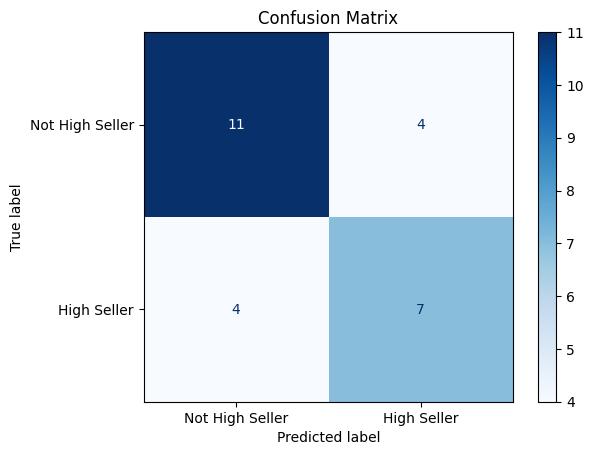

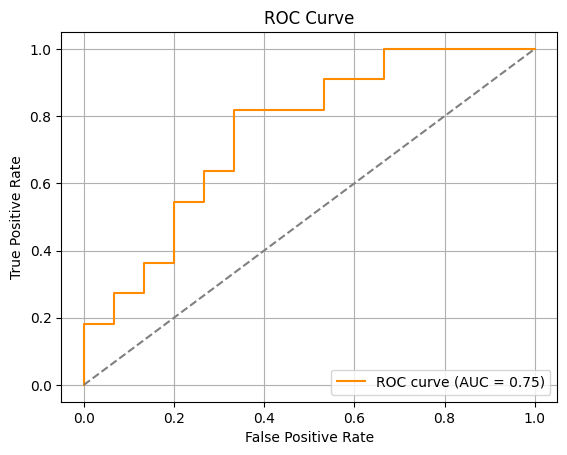

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Buat kolom target: High Seller (1) jika di atas median
df['High_Seller'] = (df['Terjual'] > df['Terjual'].median()).astype(int)

# Fitur: Harga + frekuensi kata dari Nama Barang
vectorizer = CountVectorizer(stop_words='english', max_features=20)
title_features = vectorizer.fit_transform(df['Nama Barang']).toarray()
title_df = pd.DataFrame(title_features, columns=vectorizer.get_feature_names_out())

# Gabungkan dengan kolom Harga
features = pd.concat([df[['Harga']].reset_index(drop=True), title_df], axis=1)
target = df['High_Seller'].reset_index(drop=True)

# Standarisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Model klasifikasi
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not High Seller', 'High Seller'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


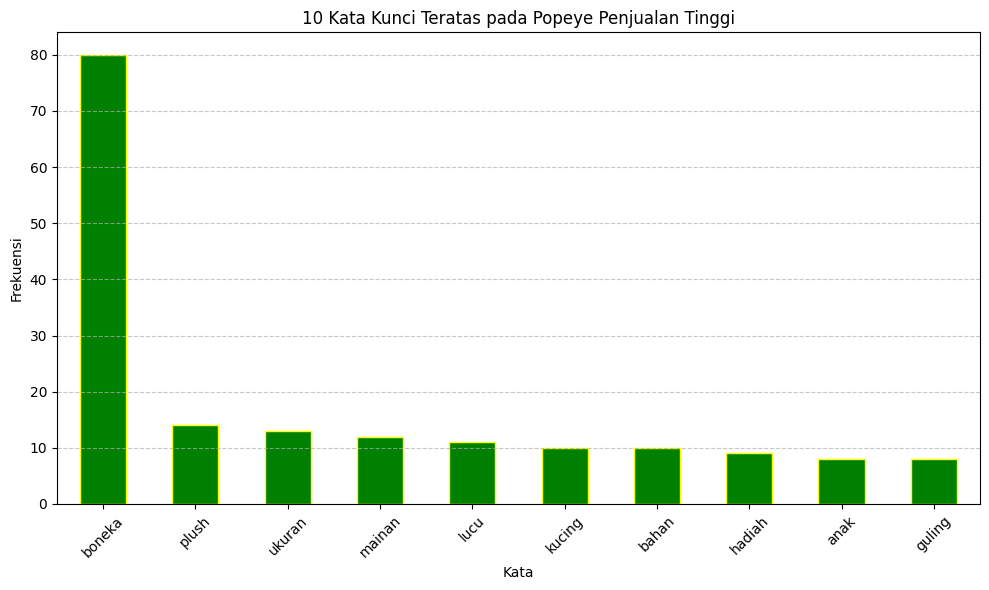

In [3]:
# Bar chart untuk 10 kata kunci teratas dari Popeye dengan penjualan tinggi
top_words = word_freq.head(10)

plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='green', edgecolor='yellow')
plt.title("10 Kata Kunci Teratas pada Popeye Penjualan Tinggi")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

